# Decompose HSC observed dual AGN

This notebook requires standard python libraries and the publicly available packages on github:

- lenstronomy (https://github.com/sibirrer/lenstronomy) (pip install lenstronomy)
    - note: if python2 used, lenstronomy version 1.3.0 version is recommended (pip install lenstronomy==1.3.0 --user)
- regions (pip install regions)
- photutils (pip install photutils)

This notebook has been tested with decompsofile ==  0.1.0

For more information, please contact me: dingxuheng@126.com

This notebook is almost identical to the 'decomprofile_HSC_QSO.ipynb', only that two point source are considerred.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits

#Data is available at: #Data is available at: https://drive.google.com/file/d/1ZO9-HzV8K60ijYWK98jGoSoZHjIGW5Lc/view?usp=sharing
fitsFile = pyfits.open('../example_files/HSC/dual_QSO/141637.44+003352.2_HSC-I.fits')

#Load the fov image data:
fov_image = fitsFile[1].data # check the back grounp

#Derive the header informaion, might be used to obtain the pixel scale and the exposure time.
header = fitsFile[1].header # if target position is add in WCS, the header should have the wcs information, i.e. header['EXPTIME']

#Derive the fov noise level map:
err_data= fitsFile[3].data ** 0.5

#Calculate the zeropoint for HSC filters:
file_header0 = fitsFile[0].header
FLUXMAG0 = file_header0['FLUXMAG0']
zp =  2.5 * np.log10(FLUXMAG0)   # This is something Xuheng can't make sure.

#Load the PSF data:
PSF = pyfits.getdata('../example_files/HSC/dual_QSO/141637.44+003352.2_HSC-I_psf.fits')

Estimating the background light ... ... ...


/Users/Dartoon/.local/lib/python2.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


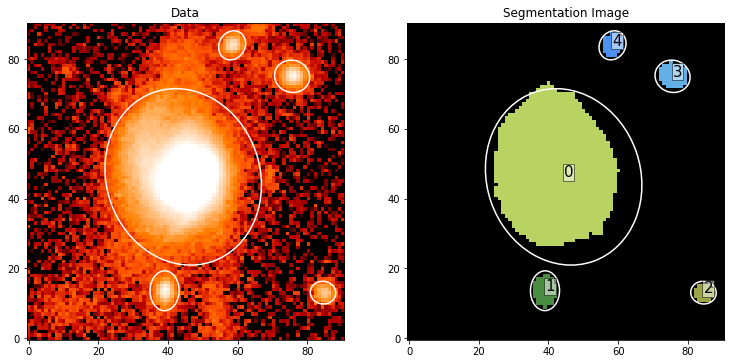

 id xcentroid ycentroid     source_sum       orientation    area 
       pix       pix                             rad        pix2 
--- --------- --------- ------------------ --------------- ------
  2     39.03     13.59   34.9859041172018   1.55747043792   52.0
  1     84.52     13.04 13.763987309447584 -0.114067014002   26.0
  0     44.38     46.27  2976.488206578838  -1.23910005849 1235.0
  3     75.64     75.13  34.39226521740688 -0.304753728373   51.0
  4     58.42     84.02 21.399921508020785   1.03021453941   35.0
Input directly the a obj idx to mask, use space between each id:
2
The data_process is ready to go to pass to FittingSpecify!


In [2]:
from decomprofile.data_process import DataProcess
image_RA = 214.156021
image_DEC = 0.564521
data_process = DataProcess(fov_image = fov_image, fov_noise_map = err_data, target_pos = [image_RA, image_DEC],
                           pos_type = 'wcs', header = header,
                          rm_bkglight = True, if_plot=False, zp = zp)

#Manually input the fov noise map:
data_process.fov_noise_map = err_data

#Generate the fitting materials
data_process.generate_target_materials(radius=45, create_mask = True, nsigma=2.8,
                                      exp_sz= 1.2, npixels = 15, if_plot=False)

#Manually input the PSF:
data_process.PSF_list = [PSF]

#Check if all the materials is given, if so to pass to the next step.
data_process.checkout() #Check if all the materials is known.

The settings for the fitting is done. Ready to pass to FittingProcess. 
  However, please make updates manullay if needed.


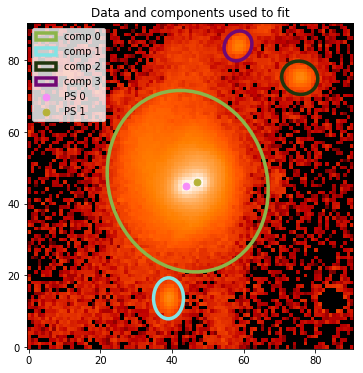

In [3]:
#%%Start to produce the class and params for lens fitting.
from decomprofile.fitting_specify import FittingSpeficy
fit_sepc = FittingSpeficy(data_process)
fit_sepc.prepare_fitting_seq(point_source_num = 2) #point_source_num =2 for dual AGN.

#Plot the initial settings for fittings. 
fit_sepc.plot_fitting_sets()

fit_sepc.build_fitting_seq()

Computing the PSO ...
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
max iteration reached! stoping
(-5.9554553551952045, 'reduced X^2 of best position')
(-24441.18877772112, 'logL')
(8208.0, 'effective number of data points')
([], 'lens result')
([{'R_sersic': 1.5877294543649993, 'n_sersic': 1.3370927711809033, 'center_x': -0.06561773413105235, 'center_y': 0.1590000426521665, 'amp': 1, 'e1': -0.08856607909095533, 'e2': -0.029094651150321598}, {'R_sersic': 0.8364931880527834, 'n_sersic': 2.2407523498470425, 'center_x': 1.0499209215802645, 'center_y': -5.2496148832325495, 'amp': 1, 'e1': 0.11623307283142316, 'e2': 0.43870768816246447}, {'R_sersic': 0.49822228327978807, 'n_sersic': 3.5120417737825718, 'center_x': -5.15004378180868, 'center_y': 5.080558410623484, 'amp': 1, 'e1': 0.21865792208929993, 'e2': 0.1450421274488766}, {'R_sersic': 0.26237908100160323, 'n_sersic': 4.390663785756411, 'center_x': -2.2134962878279656, 'center_y': 6.587338961755224, 'amp': 1, 'e1': 0.06532862463996

/Users/Dartoon/.local/lib/python2.7/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]


Computing the MCMC...
('Number of walkers = ', 280)
('Burn-in iterations: ', 100)
('Sampling iterations:', 30)
(937.0116758346558, 'time taken for MCMC sampling')
(1255.07, 'total time taken for the overall fitting (s)')
============ CONGRATULATION, YOUR JOB WAS SUCCESSFUL ================ 
Start transfering the Params to fluxs...
(8400, 'MCMC samplers in total, finished translate:', 0)
(8400, 'MCMC samplers in total, finished translate:', 1000)
(8400, 'MCMC samplers in total, finished translate:', 2000)
(8400, 'MCMC samplers in total, finished translate:', 3000)
(8400, 'MCMC samplers in total, finished translate:', 4000)
(8400, 'MCMC samplers in total, finished translate:', 5000)
(8400, 'MCMC samplers in total, finished translate:', 6000)
(8400, 'MCMC samplers in total, finished translate:', 7000)
(8400, 'MCMC samplers in total, finished translate:', 8000)


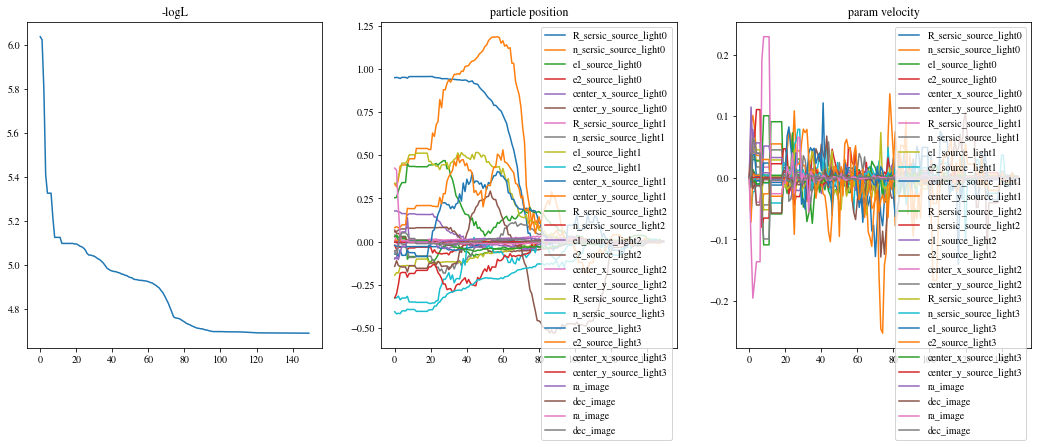

<Figure size 432x288 with 0 Axes>

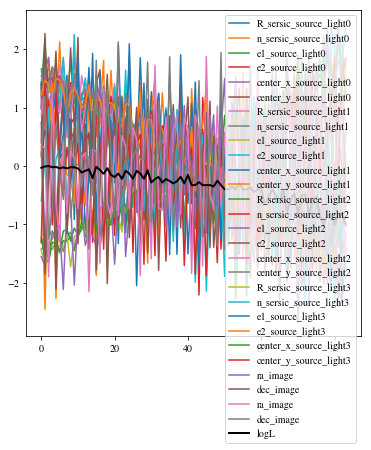

(-5.906950892960714, 'reduced X^2 of all evaluated imaging data combined.')
('reduced chi^2 of data ', 0, '= ', 5.906950892960714)


/Users/Dartoon/.local/lib/python2.7/site-packages/lenstronomy/Plots/model_band_plot.py:35: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/Users/Dartoon/.local/lib/python2.7/site-packages/lenstronomy/Plots/model_band_plot.py:82: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(self._data), origin='lower',
/Users/Dartoon/.local/lib/python2.7/site-packages/lenstronomy/Plots/model_band_plot.py:118: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(self._model), origin='lower', vmin=v_min, vmax=v_max,
/Users/Dartoon/.local/lib/python2.7/site-packages/lenstronomy/Plots/model_band_plot.py:501: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(self._data - model), origin='lower', vmin=v_min, vmax=v_max,


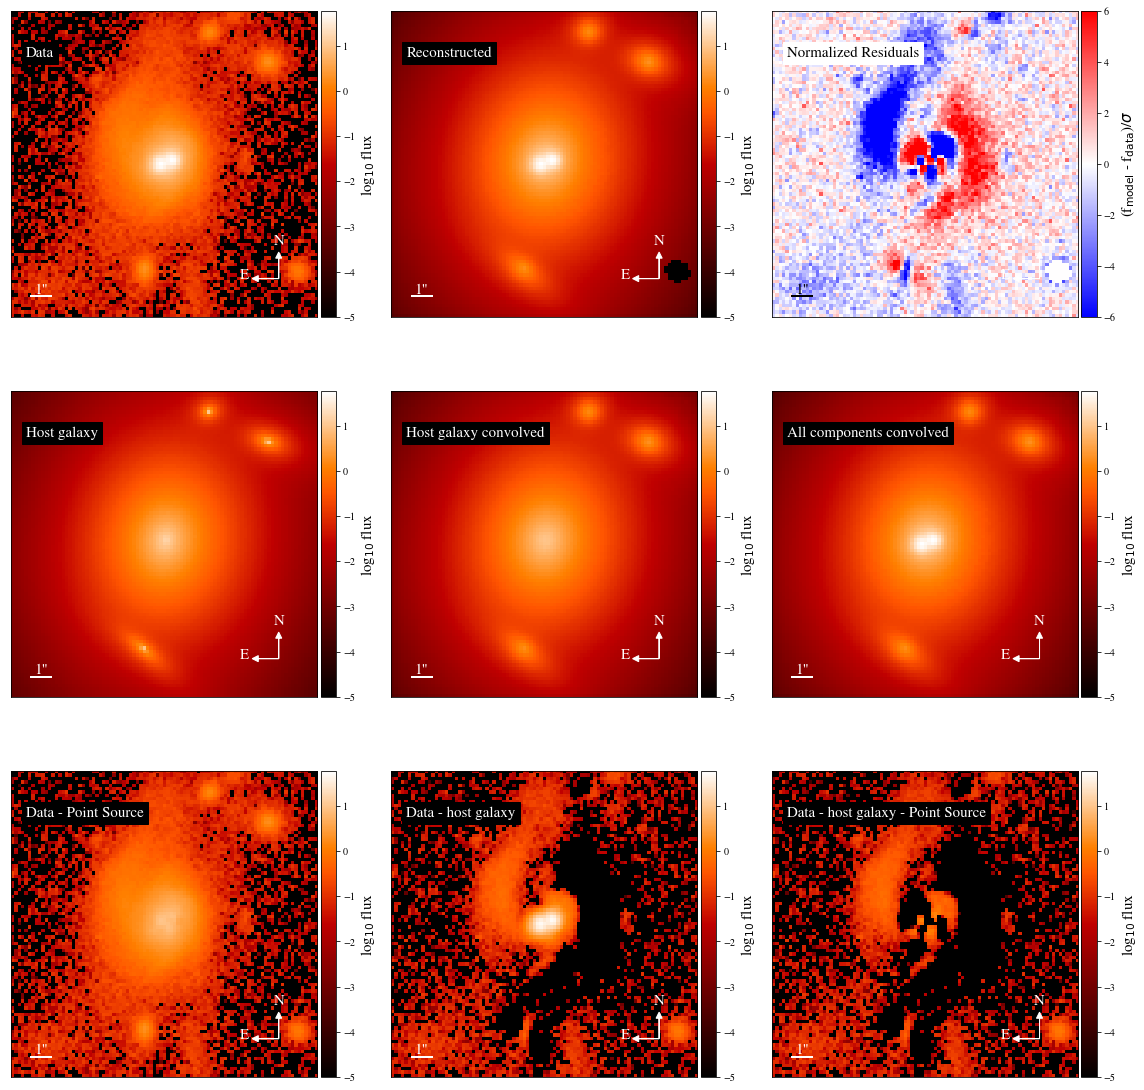

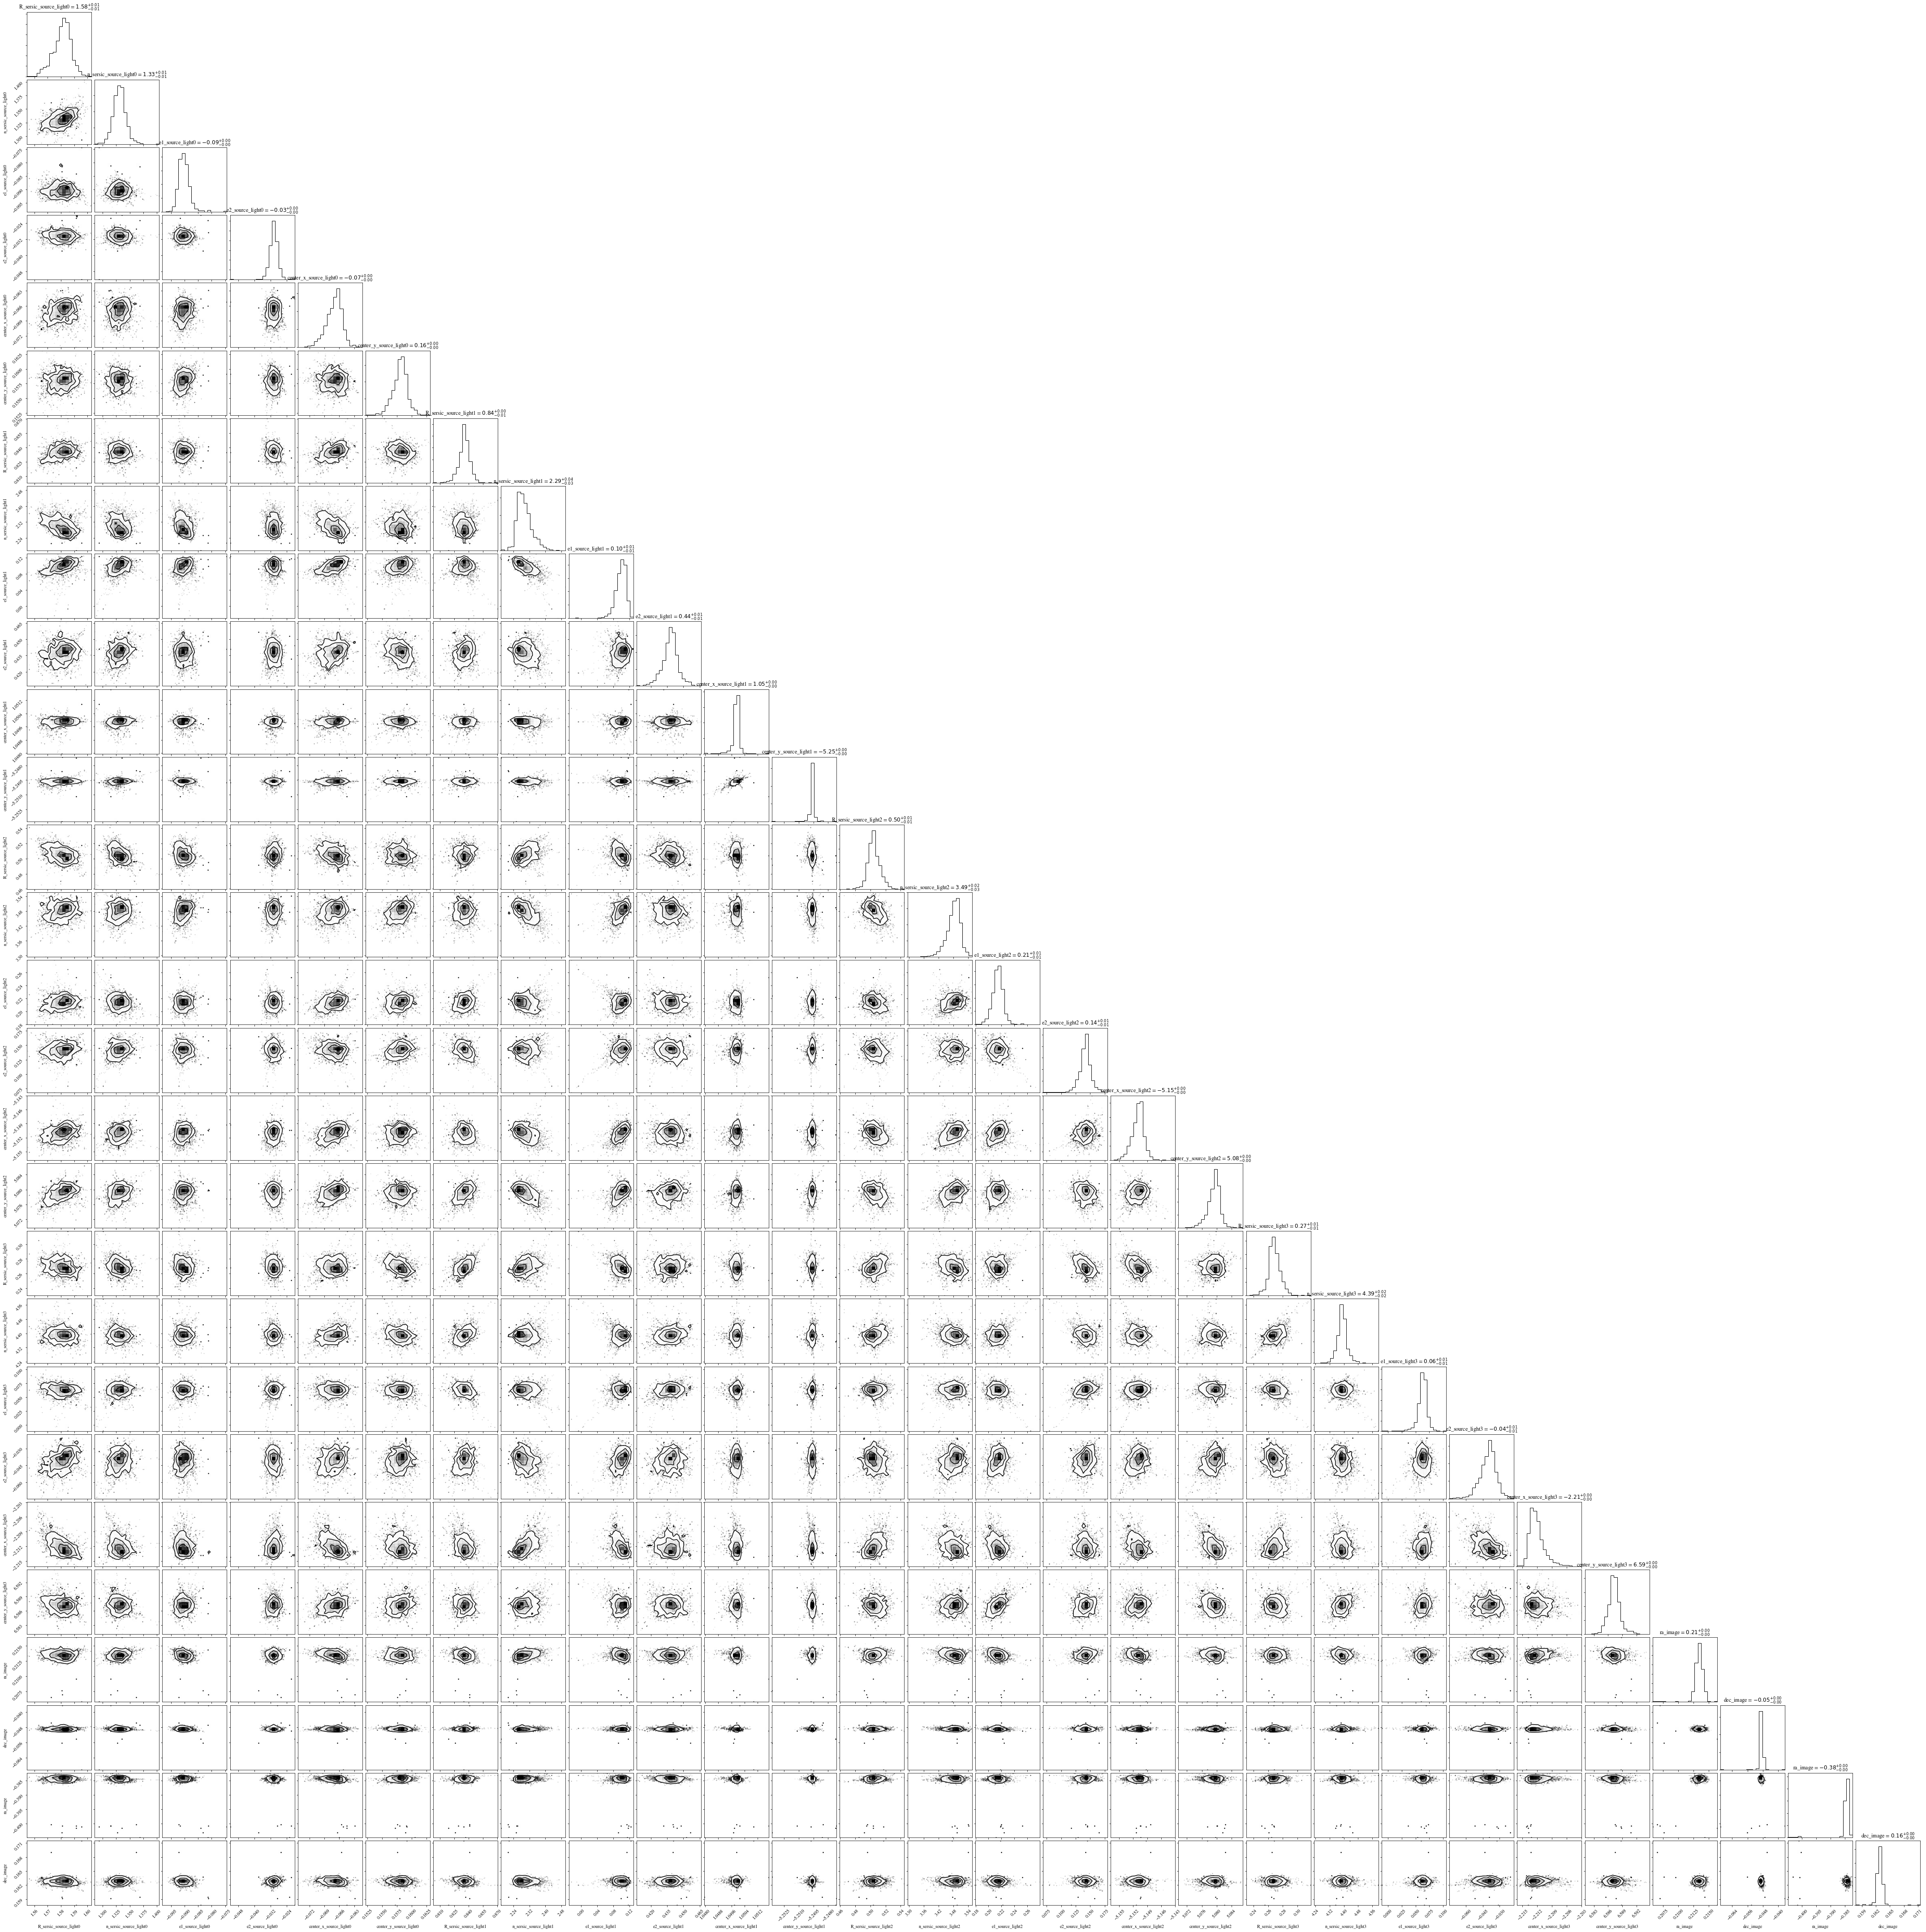

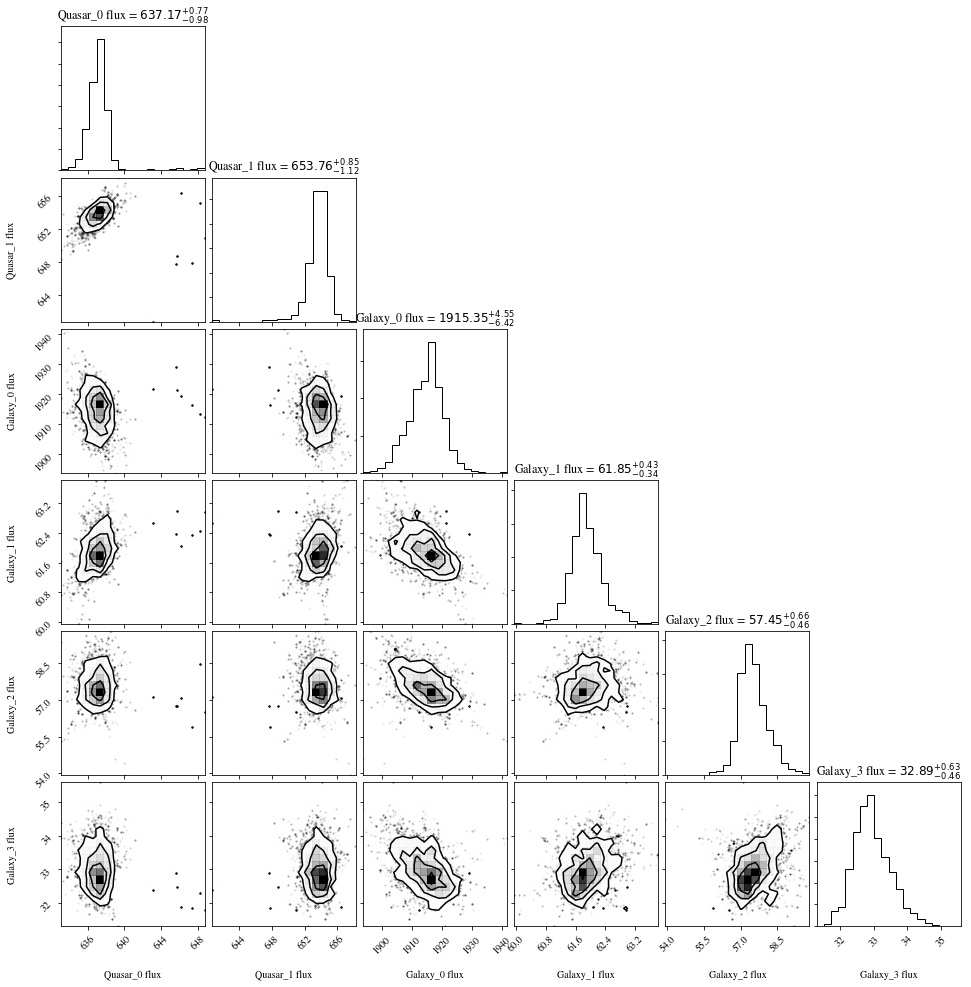

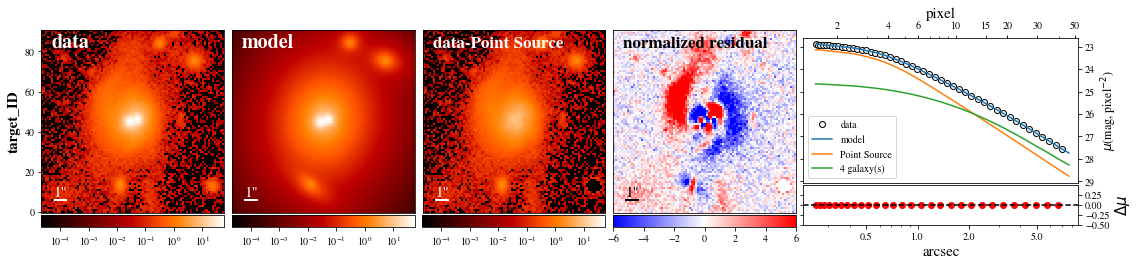

In [4]:
#%%Setting the fitting method and run.
from decomprofile.fitting_process import FittingProcess
fit_run = FittingProcess(fit_sepc, savename = 'HSC_dualAGN')
fit_run.run()
fit_run.plot_all()
fit_run.dump_result()
# # print(fit_run.final_galaxy_result[0])


In [5]:
#Load the saved fitting class, the fitting_run_result would be the loaded as fit_run() in previous fittings.
import pickle
picklename = 'HSC_dualAGN.pkl'
fitting_run_result = pickle.load(open(picklename,'rb'))
#fitting_run_result.plot_final_qso_fit()
fitting_run_result.final_result_galaxy

[{'R_sersic': 1.573411657668386,
  'amp': 69.54324534468982,
  'center_x': -0.06787240740830373,
  'center_y': 0.15893773492722219,
  'e1': -0.09174817007123476,
  'e2': -0.031205768306716994,
  'flux_sersic_model': 2331.4504634797127,
  'flux_within_frame': 1908.7989635091565,
  'magnitude': 18.79809952374633,
  'n_sersic': 1.329128288588525,
  'phi_G': -1.4068714330646381,
  'q': 0.8233038275120259},
 {'R_sersic': 0.8321256228109895,
  'amp': 12.214172498495849,
  'center_x': 1.0499149210782086,
  'center_y': -5.249627439903527,
  'e1': 0.08306245524823455,
  'e2': 0.43471206050203864,
  'flux_sersic_model': 150.15786183363377,
  'flux_within_frame': 61.329987354704485,
  'magnitude': 22.53081781214327,
  'n_sersic': 2.3974578754059737,
  'phi_G': 0.6909986886055696,
  'q': 0.3864082894411994},
 {'R_sersic': 0.5090969415286927,
  'amp': 17.464677741070766,
  'center_x': -5.1540881386891275,
  'center_y': 5.0764579724052625,
  'e1': 0.2038170543084795,
  'e2': 0.14130265259250832,
  '